In [ ]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


    

In [2]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('훈렬용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈렬용 고양이 이미지 전체 개수: 1000


In [9]:
print('훈렬용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈렬용 강아지 이미지 전체 개수: 1000


In [10]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [11]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [12]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [13]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break
    

batch data size: (20, 150, 150, 3)
batch label size: (20,)


In [24]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s 340ms/step - loss: 0.6895 - acc: 0.5325 - val_loss: 0.6725 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 20s 201ms/step - loss: 0.6528 - acc: 0.6300 - val_loss: 0.6373 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 20s 202ms/step - loss: 0.5995 - acc: 0.6760 - val_loss: 0.6382 - val_acc: 0.6310
Epoch 4/30
100/100 [==============================] - 20s 202ms/step - loss: 0.5581 - acc: 0.7195 - val_loss: 0.6375 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 20s 204ms/step - loss: 0.5261 - acc: 0.7460 - val_loss: 0.5995 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 20s 203ms/step - loss: 0.4996 - acc: 0.7595 - val_loss: 0.5543 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 20s 203ms/step - loss: 0.4693 - acc: 0.7870 - val_loss: 0.5995 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 2

In [25]:
model.save('cats_and_dogs_amall_1.h5')

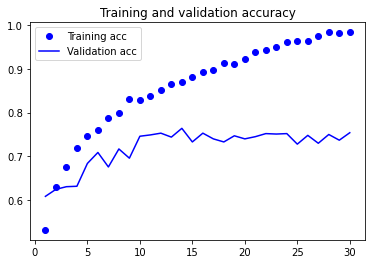

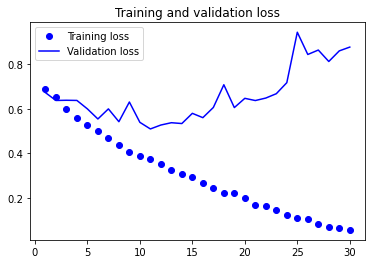

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

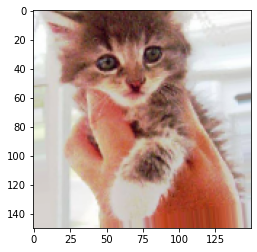

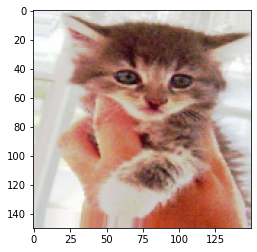

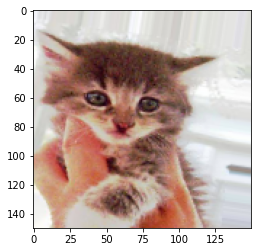

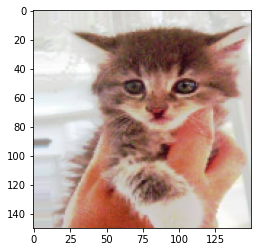

In [33]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%4 == 0:
        break

plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

hisroty = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 218ms/step - loss: 0.6785 - acc: 0.5700 - val_loss: 0.6550 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 22s 215ms/step - loss: 0.6524 - acc: 0.6240 - val_loss: 0.6742 - val_acc: 0.5820
Epoch 3/30
100/100 [==============================] - 22s 215ms/step - loss: 0.6278 - acc: 0.6530 - val_loss: 0.6272 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 22s 215ms/step - loss: 0.5994 - acc: 0.6880 - val_loss: 0.6227 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 22s 216ms/step - loss: 0.5968 - acc: 0.6665 - val_loss: 0.5909 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 22s 215ms/step - loss: 0.5865 - acc: 0.6870 - val_loss: 0.5896 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 22s 216ms/step - loss: 0.5677 - acc: 0.7085 - val_lo

In [39]:
model.save('cats_and_dogs_small_3.h5')

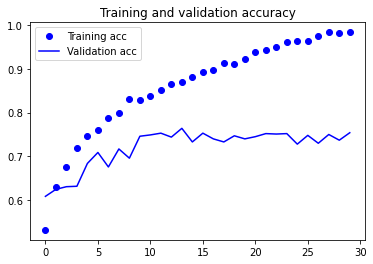

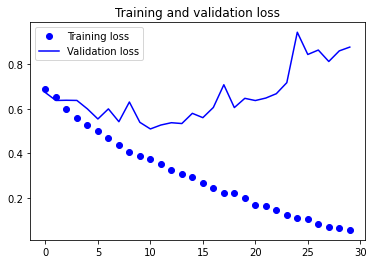

In [40]:
acc = history.history['acc']
cal_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [45]:

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [47]:

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 12ms/step - loss: 0.6016 - acc: 0.6710 - val_loss: 0.4471 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 1s 12ms/step - loss: 0.4278 - acc: 0.8110 - val_loss: 0.3659 - val_acc: 0.8660
Epoch 3/30
100/100 [==============================] - 1s 12ms/step - loss: 0.3458 - acc: 0.8580 - val_loss: 0.3342 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 1s 11ms/step - loss: 0.3232 - acc: 0.8630 - val_loss: 0.3080 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 1s 12ms/step - loss: 0.2923 - acc: 0.8820 - val_loss: 0.2910 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2601 - acc: 0.9005 - val_loss: 0.2769 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 1s 12ms/step - loss: 0.2505 - acc: 0.8950 - val_loss: 0.2715 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1s 11ms/step - 

In [49]:

import matplotlib.pyplot as plt

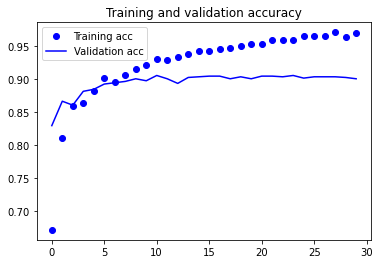

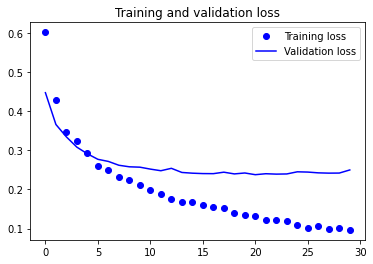

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [54]:
conv_base.trainable = False

In [55]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:',  len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 59s - loss: 0.5506 - acc: 0.7400 - val_loss: 0.4247 - val_acc: 0.8470
Epoch 2/30
100/100 - 58s - loss: 0.4070 - acc: 0.8355 - val_loss: 0.3389 - val_acc: 0.8700
Epoch 3/30
100/100 - 56s - loss: 0.3649 - acc: 0.8385 - val_loss: 0.3061 - val_acc: 0.8820
Epoch 4/30
100/100 - 58s - loss: 0.3242 - acc: 0.8740 - val_loss: 0.2837 - val_acc: 0.8870
Epoch 5/30
100/100 - 58s - loss: 0.3002 - acc: 0.8780 - val_loss: 0.2702 - val_acc: 0.8910
Epoch 6/30
100/100 - 58s - loss: 0.2853 - acc: 0.8805 - val_loss: 0.2684 - val_acc: 0.8910
Epoch 7/30
100/100 - 57s - loss: 0.2767 - acc: 0.8890 - val_loss: 0.2521 - val_acc: 0.8970
Epoch 8/30
100/100 - 57s - loss: 0.2712 - acc: 0.8870 - val_loss: 0.2487 - val_acc: 0.8980
Epoch 9/30
100/100 - 57s - loss: 0.2637 - acc: 0.8945 - val_loss: 0.2568 - val_acc: 0.8950
Epoch 10/30
100/100 - 58s - loss: 0.2512 - acc: 0.8965 - val_loss: 0.2476 - val_acc: 0.8990
Epoch

In [ ]:
model.save('cats_and_dogs_small_3.h5')

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()